## Regularization test simulation

In [1]:
%matplotlib inline

In [2]:
from sklearn.linear_model.ridge import ridge_regression

In [3]:
import os
import sys
if sys.platform is 'darwin':
    sys.path.append(os.path.join('/Users', 'njchiang', 
                                 'CloudStation', 'Grad',
                                 'Research', 'BayesReg'))
else:
    sys.path.append(os.path.join('D:\\', 
                                 'CloudStation', 'Grad',
                                 'Research', 'BayesReg'))

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from time import time

In [18]:
# Parameters of the example
np.random.seed(0)
# Create some test data
N = 2000 # features
M = 2 # response sources (voxels, whatever)
TR = 1000 # regression timepoints
TP = 200 # prediction timepoints

# snrs = np.linspace(0, 0.2, M)
snrs = 0.2
realwt = np.random.randn(N, M)
features = np.random.randn(TR+TP, N)
realresponses = np.dot(features, realwt) # shape (TR+TP, M)
noise = np.random.randn(TR+TP, M)
responses = (realresponses * snrs) + noise

y_train = responses[:TR]
y_test = responses[TR:]
x_train = features[:TR]
x_test = features[TR:]

In [19]:
L = np.diag(np.ones(N))
L[3,4] = 0.5
L[4,3] = 0.5
# L = np.linalg.pinv(np.corrcoef(realwt))
# L.shape

In [20]:
from sklearn.linear_model import Ridge, ARDRegression, LinearRegression
from TikhonovRegression import TikhonovReg, TikhonovRegCV
import TikhonovRegression as TR

In [21]:
from sklearn.linear_model.ridge import ridge_regression
ridge_regression

<function sklearn.linear_model.ridge.ridge_regression>

In [22]:
# linear regression
clfs = {'OLS': LinearRegression(), 'Ridge': Ridge(),
        'Tikhonov_auto': TikhonovReg(gamma=L, solver='auto'),
        'Tikhonov_cache': TikhonovReg(gamma=L, solver='cache')}

        # 'ARD': ARDRegression(compute_score=True)}

In [23]:
for i in clfs:
    print '--------------------------'
    print "Fitting " + i
    now = time()
    print clfs[i].fit(x_train, y_train).score(x_test,y_test)
    done = time()
    print "Finished in " + str(done-now) + 'seconds'
    print '--------------------------'

--------------------------
Fitting Tikhonov_cache


0.475866585497
Finished in 1.58700013161seconds
--------------------------
--------------------------
Fitting OLS


0.47137370871
Finished in 0.259999990463seconds
--------------------------
--------------------------
Fitting Ridge
0.47681918523
Finished in 0.0590000152588seconds
--------------------------
--------------------------
Fitting Tikhonov_auto


0.475866585497
Finished in 1.04399991035seconds
--------------------------


[ 0.22381273  0.07607833 -0.11128479  0.16522128 -0.0203737  -0.02842833
 -0.00253579 -0.08114127  0.01819455  0.03435772]
[ 0.22381273  0.07607833 -0.11128479  0.16522128 -0.0203737  -0.02842833
 -0.00253579 -0.08114127  0.01819455  0.03435772]
[ 0.22416261  0.07515899 -0.11074569  0.1872006  -0.09951985 -0.02795413
  0.00036027 -0.08444963  0.01780126  0.03465505]
[ 0.22416261  0.07515899 -0.11074569  0.1872006  -0.09951985 -0.02795413
  0.00036027 -0.08444963  0.01780126  0.03465505]


[ 0.22416261  0.07515899 -0.11074569  0.1872006  -0.09951985 -0.02795413
  0.00036027 -0.08444963  0.01780126  0.03465505]


[ 0.22416261  0.07515899 -0.11074569  0.1872006  -0.09951985 -0.02795413
  0.00036027 -0.08444963  0.01780126  0.03465505]


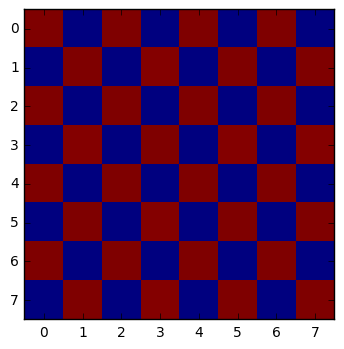

In [25]:
print clfs['Ridge'].coef_[0, :10]

print TR.ridge_regression(x_train-x_train.mean(axis=0), 
                                 y_train-y_train.mean(axis=0), alpha=1.0)[0, :10]

print clfs['Tikhonov_auto'].coef_[0, :10]
print clfs['Tikhonov_cache'].coef_[0, :10]

print TR.tikhonov_regression(x_train-x_train.mean(axis=0), 
                          y_train-y_train.mean(axis=0), 
                          alpha=1.0, L=L,
                          method='analytic')[0,:10]
print TR.tikhonov_regression(x_train-x_train.mean(axis=0), 
                          y_train-y_train.mean(axis=0), 
                          alpha=1.0, L=L,
                          method='estimate')[0,:10]


plt.imshow(np.corrcoef(np.vstack([clfs[i].coef_
                                  for i in clfs])),
           interpolation='nearest')

In [12]:
from sklearn.linear_model import RidgeCV, Ridge
Ridge(alpha=10.0).fit(x_train, y_train).coef_

array([[  3.17200293e-01,   1.38889995e-01,   3.27865446e-01,
          1.54265023e-01,   1.30345227e-02,  -8.07652929e-03,
          1.40877574e-01,   6.31018617e-02,   3.06675169e-01,
          3.14612127e-02,  -5.07798284e-01,   1.17759796e-01,
          4.96607414e-01,   5.66145759e-02,   3.34970509e-01,
          2.07337792e-02,  -1.80189961e-01,  -1.32019482e-01,
          2.57684621e-01,  -1.17622631e-01,  -2.09369222e-01,
         -4.17245547e-01,  -1.28230598e-01,  -2.53602318e-01,
         -3.66636929e-01,  -1.59879799e-01,  -1.32700570e-01,
         -3.59012902e-02,   4.15415609e-02,  -1.11651055e-01,
         -1.04229067e-01,  -1.27796513e-01,   5.81935015e-03,
         -2.90313075e-01,  -1.54192090e-01,   1.62623466e-01,
          2.57894330e-01,   8.48106232e-02,  -1.19778398e-01,
          7.10427654e-03,  -1.91518130e-01,   3.25561919e-02,
          2.30002095e-01,   1.97618883e-01,  -1.80228640e-01,
         -1.05917734e-01,   6.69603704e-02,   9.84157779e-02,
        

In [26]:
bcv1 = TikhonovRegCV(alphas = np.logspace(-3, 3, 10), gamma=L)
bcv2 = TikhonovRegCV(alphas = np.logspace(-3, 3, 10), gamma=None)
rcv1 = RidgeCV(alphas = np.logspace(-3, 3, 10))

In [27]:
bcv1.fit(x_train, y_train)
bcv2.fit(x_train, y_train)
rcv1.fit(x_train, y_train)

RidgeCV(alphas=array([  1.00000e-03,   4.64159e-03,   2.15443e-02,   1.00000e-01,
         4.64159e-01,   2.15443e+00,   1.00000e+01,   4.64159e+01,
         2.15443e+02,   1.00000e+03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [28]:
bcv1.alpha_, bcv2.alpha_, rcv1.alpha_

(0.001, 0.001, 0.001)

In [29]:
TikhonovReg(alpha=10.0, gamma=None).fit(x_train, y_train).coef_[:, :10]

array([[ 0.22161589,  0.07737897, -0.10907558,  0.16476529, -0.01903364,
        -0.02721163, -0.00323337, -0.07825861,  0.01757688,  0.03516834],
       [-0.17554613,  0.15192572, -0.19078846, -0.09156884, -0.20668626,
         0.00790044,  0.04364497, -0.02959854,  0.02813861, -0.12901043]])

In [30]:
np.abs(TikhonovReg(alpha=10.0, gamma=np.diag(np.ones(N))).fit(x_train, y_train).coef_ -
       Ridge(alpha=10.0).fit(x_train, y_train).coef_).sum()

2.1130322426683723e-12

In [31]:
rcv1.coef_[:, :10]

array([[ 0.22406267,  0.07592576, -0.11153626,  0.16526909, -0.02052859,
        -0.02856908, -0.00245212, -0.08146807,  0.01826539,  0.03426345],
       [-0.17834191,  0.15180065, -0.1911655 , -0.09087787, -0.20622054,
         0.00603497,  0.04490036, -0.02815844,  0.02958851, -0.13027301]])

In [32]:
bcv2.coef_[:, :10]

array([[ 0.22406267,  0.07592576, -0.11153626,  0.16526909, -0.02052859,
        -0.02856908, -0.00245212, -0.08146807,  0.01826539,  0.03426345],
       [-0.17834191,  0.15180065, -0.1911655 , -0.09087787, -0.20622054,
         0.00603497,  0.04490036, -0.02815844,  0.02958851, -0.13027301]])